In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import PoissonRegressor, GammaRegressor
import matplotlib.pyplot as plt
from IPython.display import Image, display
pd.set_option('max_rows', 5)
%matplotlib inline

## 一般化線形モデル
---
以下の3つの組み合わせで表現された統計モデル。

- 目的変数の確率分布
- 線形予測子
- リンク関数

線形予測子とは、説明変数 $x_{1} ,x_{2} ,\cdots $ があったときに $a_{1} x_{1} +a_{2} x_{2} +\cdots $ のように係数×説明変数の和で表されるもの。以下では切片項も加えた線形予測子 $z=a_{0} +a_{1} x_{1} +a_{2} x_{2} +\cdots $ とする。

線形予測子は $-\infty \sim \infty $ の範囲のあらゆる実数をとりうるが、目的変数は正の数などの限られた範囲しか取らない場合がある。そこで、線形予測子 $z$ を目的変数の範囲内に限定する $y=f( z)$ となる関数 $f$ が必要となる (他の目的の場合もある) が、この関数 $f$ の逆関数がリンク関数である。つまり、リンク関数とは目的変数 $y$ を線形予測子 $z$ に変換する関数。  
逆関数とは、 $y=f( x)$ という関数 $f$ に対して、 $x=g( y)$ となるような関数 $g$ のこと。

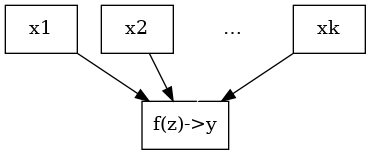

In [2]:
from my_functions.generalized_linear_model import path_diagram

Image(path_diagram.get())

## 一般化線形モデルの例
---
確率分布やリンク関数の組み合わせは多数考えられるが、多く使われるものは限られているので以下に一部を紹介する。

### 回帰分析 (regression analysis)
---
回帰分析は、1つの変数 $y$ を他の変数 $x$ で説明しようとするもの。 $x$ が1変数だけの場合を単回帰分析、2変数以上の場合を重回帰分析という。

$y=a_{0} +a_{1} x_{1} +a_{2} x_{2} +\cdots +\epsilon $

<table class="text-center border">
    <tr class="background-dark">
        <th class="border-right-bold" rowspan="2"></th>
        <th rowspan="2">概要</th>
        <th rowspan="2">$y$ の呼び方</th>
        <th class="border-right-none" rowspan="2">$x$ の呼び方</th>
        <th class="border-bottom border-left-none" colspan="2"></th>
    </tr>
    <tr class="background-dark">
        <th>変数の数</th>
        <th>分析の名称</th>
    </tr>
    <tr class="background-bright">
        <th class="background-dark border-right-bold border-bottom" rowspan="2">回帰分析</th>
        <td class="text-left" rowspan="2">1つの変数を他の変数で説明する</td>
        <td rowspan="2">従属変数<br />被説明変数<br />内生変数</td>
        <td rowspan="2">独立変数<br />説明変数<br />外生変数</td>
        <td>1つ</td>
        <td>単回帰分析</td>
    </tr>
    <tr class="background-bright">
        <td>複数</td>
        <td>重回帰分析</td>
    </tr>
    <tr class="background-bright">
        <th class="background-dark border-right-bold border-bottom">相関分析</th>
        <td class="text-left">変数間の関係の有無を調べる</td>
    </tr>
</table>

誤差項 $\epsilon $ に正規分布を仮定した回帰分析は、一般化線形モデルでは以下のように表される。 ( $i$ は各サンプルを表す添え字で $i=1,2,\cdots ,n$ )

<table class="text-center">
    <tr>
        <th>確率分布</th>
        <td class="text-left">正規分布 $\mathcal{N}\left( \mu ,\sigma ^{2}\right)$</td>
    </tr>
    <tr>
        <th>リンク関数</th>
        <td class="text-left">
            恒等関数 $g( x) =x$<br /><br />
            線形予測子からの変換 (リンク関数の逆関数) は<br />
            恒等関数 $f( x) =x$
        </td>
    </tr>
    <tr>
        <th>モデル式</th>
        <td class="text-left">
            $y_{i} \sim \mathcal{N}\left( z_{i} ,\sigma ^{2}\right)$<br />
            または<br />
            $
            \begin{cases}
                y_{i} =z_{i} +\epsilon \\
                \epsilon \sim \mathcal{N}\left( 0,\sigma ^{2}\right)
            \end{cases}
            $
        </td>
    </tr>
</table>

このとき、モデル式 $y_{i} \sim \mathcal{N}\left( z_{i} ,\sigma ^{2}\right)$ から明らかなように線形結合子 $z_{i}$ は $y_{i}$ の期待値 (平均) を表す。

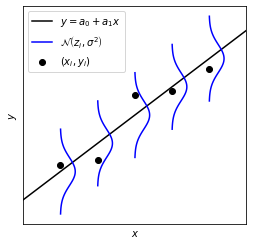

In [3]:
from my_functions.generalized_linear_model import linear_regression
linear_regression.show()

### 分散分析 (ANOVA, Analysis of Variance)
---
分散分析は、複数の群 (カテゴリ) 間の効果 (平均) に差があるかを解明しようとするもの。説明変数 $x$ は全てカテゴリ変数で、 $x$ が1つだけのものを一元配置分散分析・2つのものを二元配置分散分析という。 (2つ以上のものをまとめて多元配置分散分析ともいう)

$y=a_{0} +a_{1} x_{1} +a_{2} x_{2} +\cdots +\epsilon $

分散分析は、一般化線形モデルでは回帰分析と同様に以下のように表される。

<table class="text-center">
    <tr>
        <th>確率分布</th>
        <td class="text-left">正規分布 $\mathcal{N}\left( \mu ,\sigma ^{2}\right)$</td>
    </tr>
    <tr>
        <th>リンク関数</th>
        <td class="text-left">
            恒等関数 $g( x) =x$<br /><br />
            線形予測子からの変換 (リンク関数の逆関数) は<br />
            恒等関数 $f( x) =x$
        </td>
    </tr>
    <tr>
        <th>モデル式</th>
        <td class="text-left">
            $y_{i} \sim \mathcal{N}\left( z_{i} ,\sigma ^{2}\right)$<br />
            または<br />
            $
            \begin{cases}
                y_{i} =z_{i} +\epsilon \\
                \epsilon \sim \mathcal{N}\left( 0,\sigma ^{2}\right)
            \end{cases}
            $
        </td>
    </tr>
</table>

具体的に、3つのカテゴリ (赤・緑・青) を持つ説明変数 $x$ が1つだけの場合を考えてみる。  
$x$ をダミー変数にすると以下のようになる。

<table class="border">
    <tr>
        <th class="border-right-bold">$x$</th>
        <th>$x_{1}$ (緑を表す)</th>
        <th>$x_{2}$ (青を表す)</th>
    </tr>
    <tr>
        <td class="border-right-bold">赤</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td class="border-right-bold">緑</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td class="border-right-bold">青</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

これに基づく回帰式は $y=a_{0} +a_{1} x_{1} +a_{2} x_{2}$ になり、それぞれの値を代入してみると

<table class="text-center border">
    <tr>
        <th class="border-right-bold">$x$</th>
        <th style="min-width: 7.5em;">回帰式</th>
        <th style="min-width: 12em;">確率分布</th>
    </tr>
    <tr>
        <td class="border-right-bold">赤</td>
        <td class="text-left">$y=a_{0}$</td>
        <td class="text-left">$y_{i} \sim \mathcal{N}\left( a_{0} ,\sigma ^{2}\right)$</td>
    </tr>
    <tr>
        <td class="border-right-bold">緑</td>
        <td class="text-left">$y=a_{0} +a_{1}$</td>
        <td>$y_{i} \sim \mathcal{N}\left( a_{0} +a_{1} ,\sigma ^{2}\right)$</td>
    </tr>
    <tr>
        <td class="border-right-bold">青</td>
        <td class="text-left">$y=a_{0} +a_{2}$</td>
        <td>$y_{i} \sim \mathcal{N}\left( a_{0} +a_{2} ,\sigma ^{2}\right)$</td>
    </tr>
</table>

となり、それぞれの係数 (の和) が各群の期待値の違いを表している。

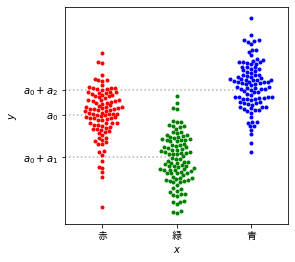

In [4]:
from my_functions.generalized_linear_model import anova
anova.show()

上のグラフは分布が見やすいようにサンプルを少しずつずらして表示してあるが、実際には各群のサンプルは一直線上に並ぶ。

### ポアソン回帰 (Poisson regression)
---
ポアソン回帰は、目的変数 $y$ が[ポアソン分布](../beginner/distribution.ipynb#%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83-(poisson-distribution))に従うと考えられる場合に使用する。  
実際には、目的変数がカウントデータ (0以上の整数) の場合に広く検討される。

ポアソン回帰は、一般化線形モデルでは以下のように表される。

<table class="text-center">
    <tr>
        <th>確率分布</th>
        <td class="text-left">ポアソン分布 $\mathcal{Poisson}\left( \lambda\right)$</td>
    </tr>
    <tr>
        <th>リンク関数</th>
        <td class="text-left">
            対数関数 $g( x) =log( x)$<br /><br />
            線形予測子からの変換 (リンク関数の逆関数) は<br />
            指数関数 $f( x) =e^{x}$
        </td>
    </tr>
    <tr>
        <th>モデル式</th>
        <td class="text-left">$y_{i} \sim \mathcal{Poisson}\left( e^{z_{i}}\right)$</td>
    </tr>
</table>

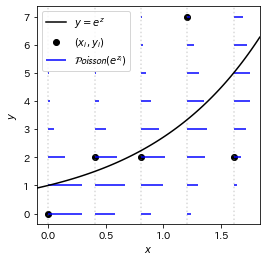

In [5]:
from my_functions.generalized_linear_model import poisson_regression

poisson_regression.show()

ポアソン回帰が想定するデータ分布の例

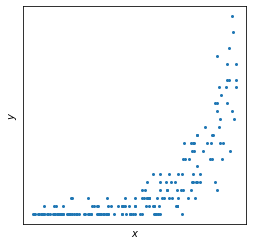

In [6]:
from my_functions.generalized_linear_model import poisson_distribution

poisson_distribution.show()

#### ポアソン回帰モデルとリンク関数の関係
---
ポアソン回帰モデルでリンク関数に対数関数が使われるのは、ポアソン分布のパラメータである**期待値 $\lambda$ を正の値に制限する**という理由が大きい。  
しかし、対数関数を用いることでポアソン回帰モデルはデータに対して以下の仮定を置くことになる。

- 各説明変数 $x_{1} ,x_{2} ,\cdots $ 同士は**積の関係**になる
 - $\lambda =exp( a_{1} x_{1} +a_{2} x_{2} +\cdots ) =e^{a_{1} x_{1}} \times e^{a_{2} x_{2}} \times \cdots $
 - リンク関数に恒等関数を用いた場合は $\displaystyle \lambda =a_{1} x_{1} +a_{2} x_{2} +\cdots $ (ただし、 $\lambda$ が負の値になりうることに注意が必要)
- 説明変数 $x$ と 目的変数の期待値 $\lambda$ の関係は非線形になる

### ロジスティック回帰 (ロジットモデル)
---
ロジスティック回帰は、目的変数 $y$ が[二項分布](../beginner/distribution.ipynb#%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83-(binomial-distribution))に従うと考えられる場合に使用する。  
実際には、目的変数が上限のあるカウントデータ (0~1の割合で表せるデータ) の場合に広く検討される。

ロジスティック回帰は、一般化線形モデルでは以下のように表される。 ( $n$ はカウントの上限)

<table class="text-center">
    <tr>
        <th>確率分布</th>
        <td class="text-left">二項分布 $\mathcal{B}( n,p)$</td>
    </tr>
    <tr>
        <th>リンク関数</th>
        <td class="text-left">
            ロジット関数 $
                \displaystyle g( x) =log\left(\frac
                    {x}
                    {1-x}
                \right)
            $<br /><br />
            線形予測子からの変換 (リンク関数の逆関数) は<br />
            ロジスティック関数 $
            \displaystyle f( x) =\frac
                {1}
                {1+e^{-x}}
            $
        </td>
    </tr>
    <tr>
        <th>モデル式</th>
        <td class="text-left">
            $
            \displaystyle y_{i} \sim \mathcal{B}\left( n,\frac
                {1}
                {1+e^{-z_{i}}}
            \right)
            $
        </td>
    </tr>
</table>

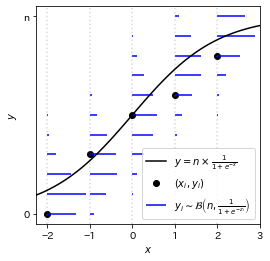

In [7]:
from my_functions.generalized_linear_model import logistic_regression

logistic_regression.show()

ロジスティック回帰が想定するデータ分布の例

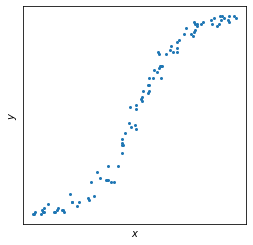

In [8]:
from my_functions.generalized_linear_model import logistic_distribution

logistic_distribution.show(100)

特に目的変数 $y$ が2値のカテゴリ変数の場合

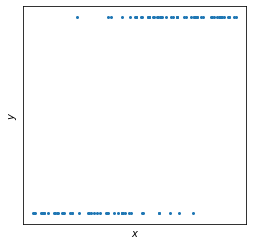

In [9]:
logistic_distribution.show(1)

### プロビットモデル (probit model)
---
プロビットモデルは、ロジットモデルと同様に目的変数 $y$ が[二項分布](../beginner/distribution.ipynb#%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83-(binomial-distribution))に従うと考えられる場合に使用する。

プロビットモデルは、一般化線形モデルでは以下のように表される。 ( $\Phi $ は標準正規分布の累積分布関数で $\displaystyle \Phi ^{-1}$ はその逆関数)

<table class="text-center">
    <tr>
        <th>確率分布</th>
        <td class="text-left">二項分布 $\mathcal{B}( n,p)$</td>
    </tr>
    <tr>
        <th>リンク関数</th>
        <td class="text-left">
            プロビット関数 $g( x) =\Phi ^{-1}( x)$<br /><br />
            線形予測子からの変換 (リンク関数の逆関数) は<br />
            標準正規分布累積関数 $f( x) =\Phi ( x)$
        </td>
    </tr>
    <tr>
        <th>モデル式</th>
        <td class="text-left">$y_{i} \sim B( n,\Phi ( z_{i}))$</td>
    </tr>
</table>

ロジットモデルとプロビットモデルの違いは、線形予測子からの変換 (確率 $p$ への変換) にロジスティック分布を使用するか正規分布を使用するかにある。

### その他の確率分布
---
その他、`statsmodels`で利用可能な主な確率分布とその確率分布にデフォルトで適用されるリンク関数の組み合わせは以下の通り。

<table class="text-center border">
    <tr>
        <th style="min-width: 7.5em;">確率分布</th>
        <th>確率分布の説明</th>
        <th style="min-width: 22.5em;">リンク関数</th>
        <th style="min-width: 11.5em;">モデル式</th>
    </tr>
    <tr>
        <td>
            負の二項分布<br />
            $\mathcal{NB}( n,p)$
        </td>
        <td class="text-left">成功確率 $p$ のベルヌーイ試行で $n$ 回成功するのに必要な試行回数の分布</td>
        <td class="text-left">対数関数 $g( x) =log( x)$<br /><br />
            線形予測子からの変換 (リンク関数の逆関数) は<br />
            指数関数 $f( x) =e^{x}$
        </td>
        <td class="text-left">
            $
            \displaystyle y_{i} \sim \mathcal{NB}\left( n,\frac
                {1}
                {1+ne^{-z_{i}}}
            \right)
            $
        </td>
    </tr>
    <tr>
        <td>
            ガンマ分布<br />
            $\mathcal{Ga}( n,\theta )$
        </td>
        <td class="text-left">単位時間あたり平均 $\theta$ 回成功するベルヌーイ試行で $n$ 回成功するのに必要な時間の分布</td>
        <td class="text-left">
            逆数関数 $
            \displaystyle g( x) =\frac
                {1}
                {x}
            $<br /><br />
            線形予測子からの変換  (リンク関数の逆関数) は<br />
            逆数関数 $
            \displaystyle f( x) =\frac
                {1}
                {x}
            $
        </td>
        <td class="text-left">
            $
            \displaystyle y_{i} \sim Ga\left( n,\frac
                {1}
                {nz_{i}}
            \right)
            $
        </td>
    </tr>
</table>

ガンマ分布のリンク関数は逆数関数では扱いづらい (負になる可能性がある) ので、対数関数もよく使用される。

`scipy.stats.gamma`の場合、引数`a=n, scale=1/theta`の関係になる。

## Pythonでの一般化線形モデルの実行方法
---
`statsmodels.genmod.generalized_linear_model.GLM`を用いる。引数`family`で確率分布を指定する。  
ロジスティック回帰のみ、`endog` (目的変数) に成功数・失敗数の2列を与える必要がある。

[一部のモデル](https://scikit-learn.org/stable/modules/classes.html#generalized-linear-models-glm-for-regression)は`sklearn.linear_model`からも利用可能。

In [10]:
sm.GLM??

In [11]:
scotland = sm.datasets.scotland.load_pandas().data
print('scotland')
display(scotland)
print(sm.datasets.scotland.DESCRLONG)
print(sm.datasets.scotland.NOTE)

scotland


,YES,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
0,60.3,712.0,21.0,105.0,82.4,13566.0,12.3,14952.0
1,52.3,643.0,26.5,97.0,80.2,13566.0,15.3,17039.5
...,...,...,...,...,...,...,...,...
30,74.7,978.0,19.3,130.0,71.5,9483.0,15.3,18875.4
31,67.3,792.0,21.2,126.0,82.2,12656.0,15.1,16790.4



This data is based on the example in Gill and describes the proportion of
voters who voted Yes to grant the Scottish Parliament taxation powers.
The data are divided into 32 council districts.  This example's explanatory
variables include the amount of council tax collected in pounds sterling as
of April 1997 per two adults before adjustments, the female percentage of
total claims for unemployment benefits as of January, 1998, the standardized
mortality rate (UK is 100), the percentage of labor force participation,
regional GDP, the percentage of children aged 5 to 15, and an interaction term
between female unemployment and the council tax.

The original source files and variable information are included in
/scotland/src/

::

    Number of Observations - 32 (1 for each Scottish district)

    Number of Variables - 8

    Variable name definitions::

        YES    - Proportion voting yes to granting taxation powers to the
                 Scottish parliament.
        COUTAX - Amount 

In [12]:
# ガンマ分布と対数リンク関数を使用
gamma_model = sm.GLM(scotland.iloc[:, 0],
                     sm.add_constant(scotland.iloc[:, 1:]),
                     family=sm.families.Gamma(sm.families.links.log()))
gamma_fitted = gamma_model.fit()
gamma_fitted.summary()

/root/local/python-3.7.4/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                       0.0035927
Method:                          IRLS   Log-Likelihood:                -83.110
Date:                Sat, 16 May 2020   Deviance:                     0.087988
Time:                        16:00:25   Pearson chi2:                   0.0862
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.6581      0.680      8.318      0.000       4.325       6.991
COUTAX                -0.0024      0.001     -2.466      0.014      -0.004      -0.000
UNEMPF                -0.1005      0.031     -3.269      0.001      -0.161      -0.040
MOR                    0.0048      0.002      2.946      0.003       0.002       0.008
ACT                   -0.0067      0.003     -2.534      0.011      -0.012      -0.002
GDP                 8.173e-06   7.19e-06      1.136      0.256   -5.93e-06    2.23e-05
AGE                    0.0298      0.015      2.009      0.045       0.001       0.059
COUTAX_FEMALEUNEMP     0.0001   4.33e-05      2.724      0.006    3.31e-05       0.000
======================================================================================
"""

In [13]:
PoissonRegressor??

In [14]:
warpbreaks = sm.datasets.get_rdataset('warpbreaks').data
for col in ['wool', 'tension']:
    warpbreaks[col] = pd.Categorical(warpbreaks[col]).codes
print('warpbreaks')
display(warpbreaks)

/root/local/python-3.7.4/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


warpbreaks


,breaks,wool,tension
0,26,0,1
1,30,0,1
...,...,...,...
52,16,1,0
53,28,1,0


In [15]:
poisson = PoissonRegressor(alpha=0)
poisson.fit(warpbreaks.iloc[:, 1:], warpbreaks.iloc[:, 0])
print(f'切片項 : {poisson.intercept_}')
for name, value in zip(warpbreaks.columns[1:], poisson.coef_):
    print(f'{name}の係数 : {value}')

切片項 : 3.348852487422661
woolの係数 : -0.20598890381313098
tensionの係数 : 0.08397993297192413


In [16]:
# statsmodelsの結果と比較
poisson_model = sm.GLM(warpbreaks.iloc[:, 0],
                       sm.add_constant(warpbreaks.iloc[:, 1:]),
                       family=sm.families.Poisson())
poisson_fitted = poisson_model.fit()
poisson_fitted.params

/root/local/python-3.7.4/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      3.348852
wool      -0.205988
tension    0.083980
dtype: float64

###### 練習問題

`road`データセットに対して、`deaths`を目的変数・`rural`を説明変数にしてポアソン回帰を適用し、回帰曲線とデータ点をグラフ表示する。

In [17]:
road = sm.datasets.get_rdataset('road', 'MASS').data
print('road')
display(road)

/root/local/python-3.7.4/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


road


,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
...,...,...,...,...,...,...
Mo,1289,234,63.0,100.0,40,180.0
Mont,259,38,4.6,72.0,29,31.0


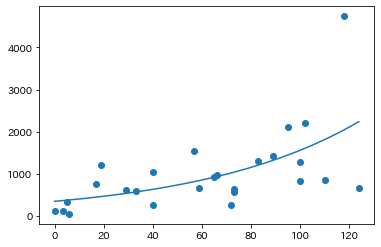

In [18]:
poisson_model = sm.GLM(road['deaths'],
                       sm.add_constant(road['rural']),
                       family=sm.families.Poisson()).fit()
plt.scatter('rural', 'deaths', data=road)
xx = np.linspace(road['rural'].min(), road['rural'].max(), 20)
# coefficient = poisson_model.params['rural']
# intercept = poisson_model.params['const']
# plt.plot(xx, np.exp(coefficient * xx + intercept))
plt.plot(xx, poisson_model.predict(sm.add_constant(xx)))
plt.show()

###### 練習問題

`star98`データセットに対して、`NABOVE`を成功数・`NBELOW`を失敗数・`LOWINC`を説明変数にしてロジスティック回帰を適用し、回帰曲線とデータ点をグラフ表示する。 (グラフの縦軸は成功割合にする)

In [19]:
dataset = sm.datasets.star98
star98 = dataset.load(as_pandas=True).data
print('star98')
display(star98)
print(dataset.DESCRLONG)
print(dataset.NOTE)

star98


,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.918370,14.70646,59.15732,4.445207,...,0.0,22.22222,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.636360,16.08324,59.50397,5.267598,...,0.0,0.00000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,199.0,510.0,70.62104,20.461720,2.989345,17.423050,11.032860,16.56420,61.70566,3.970984,...,0.0,13.63636,182.750500,680.78991,1022.1049,98.82377,60.13205,376.8523,11276.7402,1496.4746
302,72.0,84.0,77.74827,5.998899,9.576225,11.117230,7.874016,16.91871,65.09957,6.913397,...,0.0,0.00000,133.218193,512.59506,1101.4007,138.49276,162.66815,471.3534,8672.4471,3258.6530



This data is on the California education policy and outcomes (STAR program
results for 1998.  The data measured standardized testing by the California
Department of Education that required evaluation of 2nd - 11th grade students
by the the Stanford 9 test on a variety of subjects.  This dataset is at
the level of the unified school district and consists of 303 cases.  The
binary response variable represents the number of 9th graders scoring
over the national median value on the mathematics exam.

The data used in this example is only a subset of the original source.

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income stu

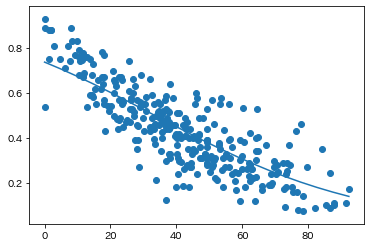

In [20]:
logit_model = sm.GLM(star98[['NABOVE', 'NBELOW']],
                     sm.add_constant(star98['LOWINC']),
                     family=sm.families.Binomial()).fit()
plt.scatter(star98['LOWINC'],
            star98['NABOVE'] / (star98['NABOVE'] + star98['NBELOW']))
xx = np.linspace(star98['LOWINC'].min(), star98['LOWINC'].max(), 20)
# coefficient = logit_model.params['LOWINC']
# intercept = logit_model.params['const']
# plt.plot(xx, 1 / (1 + np.exp(-(coefficient * xx + intercept))))
plt.plot(xx, logit_model.predict(sm.add_constant(xx)))
plt.show()

## 推薦図書
---
- [RとStanではじめる ベイズ統計モデリングによるデータ分析入門](https://www.amazon.co.jp/%E5%AE%9F%E8%B7%B5Data-Science%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-R%E3%81%A8Stan%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B-%E3%83%99%E3%82%A4%E3%82%BA%E7%B5%B1%E8%A8%88%E3%83%A2%E3%83%87%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%AB%E3%82%88%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E5%85%A5%E9%96%80-%E9%A6%AC%E5%A0%B4/dp/4065165369/)
- [データ解析のための統計モデリング入門――一般化線形モデル・階層ベイズモデル・MCMC](https://www.amazon.co.jp/%E3%83%87%E3%83%BC%E3%82%BF%E8%A7%A3%E6%9E%90%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E7%B5%B1%E8%A8%88%E3%83%A2%E3%83%87%E3%83%AA%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80%E2%80%95%E2%80%95%E4%B8%80%E8%88%AC%E5%8C%96%E7%B7%9A%E5%BD%A2%E3%83%A2%E3%83%87%E3%83%AB%E3%83%BB%E9%9A%8E%E5%B1%A4%E3%83%99%E3%82%A4%E3%82%BA%E3%83%A2%E3%83%87%E3%83%AB%E3%83%BBMCMC-%E7%A2%BA%E7%8E%87%E3%81%A8%E6%83%85%E5%A0%B1%E3%81%AE%E7%A7%91%E5%AD%A6-%E4%B9%85%E4%BF%9D-%E6%8B%93%E5%BC%A5/dp/400006973X/)
- [ベイズ統計モデリング: R,JAGS, Stanによるチュートリアル](https://www.amazon.co.jp/%E3%83%99%E3%82%A4%E3%82%BA%E7%B5%B1%E8%A8%88%E3%83%A2%E3%83%87%E3%83%AA%E3%83%B3%E3%82%B0-R-JAGS-Stan%E3%81%AB%E3%82%88%E3%82%8B%E3%83%81%E3%83%A5%E3%83%BC%E3%83%88%E3%83%AA%E3%82%A2%E3%83%AB-%E5%8E%9F%E8%91%97%E7%AC%AC2%E7%89%88/dp/4320113160/)